## **GPU Allocated Status**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Accessing AWS s3 Bucket**

In [ ]:
# Installing boto3 package
!pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 14.2 MB/s 
     |████████████████████████████████| 79 kB 7.7 MB/s 
     |████████████████████████████████| 9.9 MB 64.5 MB/s 
     |████████████████████████████████| 140 kB 40.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


In [ ]:
# Credentials for s3 Bucket
ACCESS_KEY_ID = 'ACCESS_KEY_ID'
ACCESS_SECRET_KEY = 'ACCESS_SECRET_KEY'
REGION = 'ap-south-1'
BUCKET_NAME = 'forrest-mgmt-s3'

In [ ]:
# Function for getting file from s3 bucket
def s3bucket_getfile(file_path):
  
    s3 =  boto3.resource('s3', aws_access_key_id=ACCESS_KEY_ID, aws_secret_access_key=ACCESS_SECRET_KEY)
  
    obj  = s3.Object(BUCKET_NAME,file_path)
  
    try:
  
        file_stream = obj.get()['Body'].read()
  
        if "pdf" in file_path:
            response = HttpResponse(file_stream, content_type='application/pdf')
  
        if "jpg" in file_path:
            response = HttpResponse(file_stream,content_type="image/jpeg")
  
        if "JPG" in file_path:
            response = HttpResponse(file_stream,content_type="image/jpeg")
  
        response['Content-Disposition'] = 'filename=%s' %  file_path
  
        return response
    except:
        return False

In [ ]:
from PIL import Image
import io
def modify_image(image, format):
    pil_image = Image.open(image)

    # Prints out (1280, 960) 
    print(pil_image.size)

    in_mem_file = io.BytesIO()

    # format here would be something like "JPEG". See below link for more info.
    pil_image.save(in_mem_file, format=format)
    return in_mem_file.getvalue()

KeyError: ignored

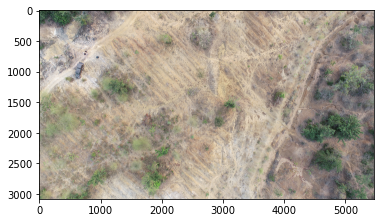

In [ ]:
#NEW-NEW
# Importing boto3 and json packages for reading images and parsing the json files respectivley 
import boto3
import json

from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import cv2

from PIL import Image, ImageDraw
from io import BytesIO
import numpy as np

s3r = boto3.resource('s3', aws_access_key_id=ACCESS_KEY_ID,aws_secret_access_key=ACCESS_SECRET_KEY,region_name = REGION)

aws_s3_paths = ["L_Folder1/L_Folder_1/L_1_e_35_label/"]
# aws_s3_paths = ["L_Folder1/L_Folder_1/L_1_e_35_label/"]
# b - 913
# c - 944
# d - 440
# e - 644

my_bucket = s3r.Bucket(BUCKET_NAME)
idx=1

for aws_s3_path in aws_s3_paths:

    for my_bucket_object in my_bucket.objects.filter(Prefix=aws_s3_path):
        # print(my_bucket_object.key)
        # print(my_bucket_object.get()['Body'].read().decode('utf-8'))
        aa = my_bucket_object.get()['Body'].read().decode('utf-8')
        if idx == 1: 
            idx+=1 
            continue
        # print(len(aa))
        # print(aa)
        d = json.loads(aa)

        s3bucket_getfile(d['task']['data']['image'])
        # obj  = s3r.Object(BUCKET_NAME,'L_Folder1/L_Folder_1/L_Folder_1_a_35/DJI_20220405170432_0011_KML_1.JPG')
        obj  = s3r.Object(BUCKET_NAME,d['task']['data']['image'][21:])

        response = obj.get()
        file_stream = response['Body']
        im = Image.open(file_stream)
        im.show()
        # print(type(im))
        width, height = im.size
        # print(width,height)
        aa = np.array(im)


        #img = cv2.imread(im) # reads image
        plt.imshow(aa)

        im.show()

        draw = ImageDraw.Draw(im)

        img = Image.new("RGB", (width, height), (0, 0, 0))
        aa = np.array(img)

        # plt.imshow(aa)
        # draw1 = ImageDraw.Draw(img)
        # draw2 = ImageDraw.Draw(img)
        #orginal_width = d['result']['value']['original_width']
        #orginal_height = d['result']['value']['original_height']


        # img.save('/content/image.jpg')

        # print(type(d)) #<-- Dict
        img = Image.new("RGB", (width, height), (0, 0, 0))


        # Remove 'Others' and 'Bushes'
        new_d = []
        for di in d['result']:
            # print(di['value']['rectanglelabels']
            if(di['value']['rectanglelabels'] != ['Others'] and di['value']['rectanglelabels'] != ['Bushes']):
                new_d.append(di)
        # print(d['result'], new_d)

        # use new_d


        for item in new_d:
            # print(item)
            draw1 = ImageDraw.Draw(img)
            aa = item['value']
            x = aa['x'] / 100.0 * item['original_width']
            y = aa['y']/ 100.0 * item['original_height']
            w = aa['width'] / 100.0 * item['original_width']
            h = aa['height'] / 100.0 * item['original_height']
            text = aa['rectanglelabels']
            xc = x + w / 2.0
            yc = y + h / 2.0
            # print(text)
            #x, y, w, h  = item['value']
            #draw1.rectangle([x, y, x+w, y+h], outline='red', width=5)
            
            # draw1.point((xc-1,yc-1),fill='white')
            # draw1.point((xc,yc-1),fill='white')
            # draw1.point((xc+1,yc-1),fill='white')
            # draw1.point((xc-1,yc),fill='white')
            # draw1.point((xc,yc),fill='white')
            # draw1.point((xc+1,yc),fill='white')
            # draw1.point((xc-1,yc+1),fill='white')
            # draw1.point((xc,yc+1),fill='white')
            # draw1.point((xc+1,yc+1),fill='white')

            for i in range(int(xc)-12, int(xc)+13):
              for j in range(int(yc)-12, int(yc)+13):
                draw1.point((i,j),fill='white')


            # shape = [(xc-10, yc-10), (xc+10, yc+10)]
            # draw1.ellipse(shape, fill ="white", outline ="white")
            draw1.text([x, y-10], text)
            # plt.imshow(img)
            # img.save('/content/'+item['id']+'.jpg')
        img.save("/content/drive/MyDrive/local_data/annotated_s_d25/" + str(d['id']) +".jpg")



        
        # get a json dict 'd'

        # print(d)
        #print(d['task']['data']['image'])
        # print(d['result'])
        # print(type(d))
        # for l in d['result']:
        #   #print(l['value']['rectanglelabels'][0].endswith('Tree'))
        #   if l['value']['rectanglelabels'][0].endswith('Tree') == True:
        #     print(l['value']['rectanglelabels'])
        # break
    #    print(type(d))
    #    results = []
    #    imagepath = aa['data']['image']
        # for i in d['result']:
        #     for j not in l['value']:

In [ ]:
import os


len(os.listdir(path="/content/drive/MyDrive/local_data/annotated_s_d25/"))

399

KeyError: ignored

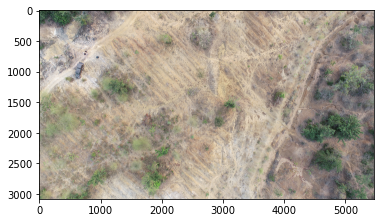

In [ ]:
#NEW
# Importing boto3 and json packages for reading images and parsing the json files respectivley 
import boto3
import json

from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import cv2

from PIL import Image, ImageDraw
from io import BytesIO
import numpy as np

s3r = boto3.resource('s3', aws_access_key_id=ACCESS_KEY_ID,aws_secret_access_key=ACCESS_SECRET_KEY,region_name = REGION)

aws_s3_paths = ["L_Folder1/L_Folder_1/L_1_a_35_label/", "L_Folder1/L_Folder_1/L_1_b_35_label/","L_Folder1/L_Folder_1/L_1_c_35_label/","L_Folder1/L_Folder_1/L_1_d_35_label/","L_Folder1/L_Folder_1/L_1_e_35_label/"]
# aws_s3_paths = ["L_Folder1/L_Folder_1/L_1_e_35_label/"]

my_bucket = s3r.Bucket(BUCKET_NAME)
idx=1

for aws_s3_path in aws_s3_paths:
    for my_bucket_object in my_bucket.objects.filter(Prefix=aws_s3_path):
        # print(my_bucket_object.key)
        # print(my_bucket_object.get()['Body'].read().decode('utf-8'))
        aa = my_bucket_object.get()['Body'].read().decode('utf-8')
        if idx == 1: 
            idx+=1 
            continue
        # print(len(aa))
        # print(aa)
        d = json.loads(aa)

        s3bucket_getfile(d['task']['data']['image'])
        # obj  = s3r.Object(BUCKET_NAME,'L_Folder1/L_Folder_1/L_Folder_1_a_35/DJI_20220405170432_0011_KML_1.JPG')
        obj  = s3r.Object(BUCKET_NAME,d['task']['data']['image'][21:])

        response = obj.get()
        file_stream = response['Body']
        im = Image.open(file_stream)
        im.show()
        # print(type(im))
        width, height = im.size
        # print(width,height)
        aa = np.array(im)


        #img = cv2.imread(im) # reads image
        plt.imshow(aa)

        im.show()

        draw = ImageDraw.Draw(im)

        img = Image.new("RGB", (width, height), (0, 0, 0))
        aa = np.array(img)

        # plt.imshow(aa)
        # draw1 = ImageDraw.Draw(img)
        # draw2 = ImageDraw.Draw(img)
        #orginal_width = d['result']['value']['original_width']
        #orginal_height = d['result']['value']['original_height']


        # img.save('/content/image.jpg')

        # print(type(d)) #<-- Dict
        img = Image.new("RGB", (width, height), (0, 0, 0))


        # Remove 'Others' and 'Bushes'
        new_d = []
        for di in d['result']:
            # print(di['value']['rectanglelabels']
            if(di['value']['rectanglelabels'] != ['Others'] and di['value']['rectanglelabels'] != ['Bushes']):
                new_d.append(di)
        # print(d['result'], new_d)

        # use new_d


        for item in new_d:
            # print(item)
            draw1 = ImageDraw.Draw(img)
            aa = item['value']
            x = aa['x'] / 100.0 * item['original_width']
            y = aa['y']/ 100.0 * item['original_height']
            w = aa['width'] / 100.0 * item['original_width']
            h = aa['height'] / 100.0 * item['original_height']
            text = aa['rectanglelabels']
            xc = x + w / 2.0
            yc = y + h / 2.0
            # print(text)
            #x, y, w, h  = item['value']
            #draw1.rectangle([x, y, x+w, y+h], outline='red', width=5)
            draw1.point((xc,yc),fill='white')
            # shape = [(xc-10, yc-10), (xc+10, yc+10)]
            # draw1.ellipse(shape, fill ="white", outline ="white")
            draw1.text([x, y-10], text)
            # plt.imshow(img)
            # img.save('/content/'+item['id']+'.jpg')
        img.save("/content/drive/MyDrive/local_data/annotated_s/" + str(d['id']) +".jpg")



        
        # get a json dict 'd'

        # print(d)
        #print(d['task']['data']['image'])
        # print(d['result'])
        # print(type(d))
        # for l in d['result']:
        #   #print(l['value']['rectanglelabels'][0].endswith('Tree'))
        #   if l['value']['rectanglelabels'][0].endswith('Tree') == True:
        #     print(l['value']['rectanglelabels'])
        # break
    #    print(type(d))
    #    results = []
    #    imagepath = aa['data']['image']
        # for i in d['result']:
        #     for j not in l['value']:

In [ ]:
#OLD
# Importing boto3 and json packages for reading images and parsing the json files respectivley 
import boto3
import json
s3r = boto3.resource('s3', aws_access_key_id=ACCESS_KEY_ID,aws_secret_access_key=ACCESS_SECRET_KEY,region_name = REGION)

aws_s3_path = "L_Folder1/L_Folder_1/L_1_a_35_label/"

my_bucket = s3r.Bucket(BUCKET_NAME)
idx=1
temp = []
for my_bucket_object in my_bucket.objects.filter(Prefix=aws_s3_path):
    # print(my_bucket_object.key)
    # print(my_bucket_object.get()['Body'].read().decode('utf-8'))
    aa = my_bucket_object.get()['Body'].read().decode('utf-8')
    if idx == 1: 
      idx+=1 
      continue
    # print(len(aa))
    # print(aa)
    d = json.loads(aa)

    # get a json dict 'd'

    temp.append(d)

    #print(d['task']['data']['image'])
    # print(d['result'])
    # print(type(d))
    # for l in d['result']:
    #   #print(l['value']['rectanglelabels'][0].endswith('Tree'))
    #   if l['value']['rectanglelabels'][0].endswith('Tree') == True:
    #     print(l['value']['rectanglelabels'])
    # break
#    print(type(d))
#    results = []
#    imagepath = aa['data']['image']
    # for i in d['result']:
    #     for j not in l['value']:

In [ ]:
len(temp)

65

In [ ]:
import json
jsonFile = open('test.json')
data = json.load(jsonFile)
print(data)
jsonFile.close()


In [ ]:
# d is a single image's json containing all annotations
# print(d)
# print(type(d))
temp = d['result']
print(temp)
# d['result'][0]
# print(d['result'][0])
# type(d['result'][0]) #dict
# print(d['result'][0]['value'])
# type(d['result'][0]['value']) #dict

[{'original_width': 5472, 'original_height': 3078, 'image_rotation': 0, 'value': {'x': 88.48041591813389, 'y': 0.38134118273275175, 'width': 7.155021168860924, 'height': 12.202917847448058, 'rotation': 0, 'rectanglelabels': ['LightGreenTree']}, 'id': 'ziAHiPXOEm', 'from_name': 'label', 'to_name': 'image', 'type': 'rectanglelabels', 'origin': 'manual'}, {'original_width': 5472, 'original_height': 3078, 'image_rotation': 0, 'value': {'x': 96.13628856881508, 'y': 0.6355686378879197, 'width': 3.863711431184909, 'height': 10.2962119337843, 'rotation': 0, 'rectanglelabels': ['DarkGreenTree']}, 'id': '5SuRmW1A9J', 'from_name': 'label', 'to_name': 'image', 'type': 'rectanglelabels', 'origin': 'manual'}, {'original_width': 5472, 'original_height': 3078, 'image_rotation': 0, 'value': {'x': 95.70698729868342, 'y': 15.507874764465239, 'width': 4.006811854562132, 'height': 13.60116885080148, 'rotation': 0, 'rectanglelabels': ['DryTree']}, 'id': 't8Ey1FbWAQ', 'from_name': 'label', 'to_name': 'image'

In [ ]:
# print(type(d),type(d['result']))
new_d = []
for di in d['result']:
    # print(di['value']['rectanglelabels']
    if(di['value']['rectanglelabels'] != ['Others'] and di['value']['rectanglelabels'] != ['Bushes']):
        new_d.append(di)
print(new_d)
# for l in new_d:
#     print(l['value']['rectanglelabels'])


[{'original_width': 5472, 'original_height': 3078, 'image_rotation': 0, 'value': {'x': 88.48041591813389, 'y': 0.38134118273275175, 'width': 7.155021168860924, 'height': 12.202917847448058, 'rotation': 0, 'rectanglelabels': ['LightGreenTree']}, 'id': 'ziAHiPXOEm', 'from_name': 'label', 'to_name': 'image', 'type': 'rectanglelabels', 'origin': 'manual'}, {'original_width': 5472, 'original_height': 3078, 'image_rotation': 0, 'value': {'x': 96.13628856881508, 'y': 0.6355686378879197, 'width': 3.863711431184909, 'height': 10.2962119337843, 'rotation': 0, 'rectanglelabels': ['DarkGreenTree']}, 'id': '5SuRmW1A9J', 'from_name': 'label', 'to_name': 'image', 'type': 'rectanglelabels', 'origin': 'manual'}, {'original_width': 5472, 'original_height': 3078, 'image_rotation': 0, 'value': {'x': 95.70698729868342, 'y': 15.507874764465239, 'width': 4.006811854562132, 'height': 13.60116885080148, 'rotation': 0, 'rectanglelabels': ['DryTree']}, 'id': 't8Ey1FbWAQ', 'from_name': 'label', 'to_name': 'image'

In [ ]:
# type(new_d)
# print(type(new_d[0])) #dict
new_d[1]

In [ ]:
print(d['task']['data']['image'][21:])

L_Folder1/L_Folder_1/L_Folder_1_a_35/DJI_20220405170551_0032_KML_1.JPG


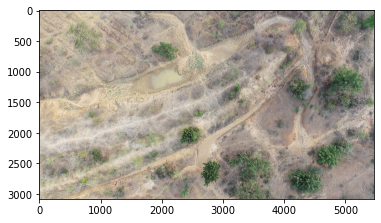

In [ ]:
#import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
#import numpy as np
#import io
s3r = boto3.resource('s3', aws_access_key_id=ACCESS_KEY_ID,aws_secret_access_key=ACCESS_SECRET_KEY,region_name = REGION)
from PIL import Image, ImageDraw
from io import BytesIO
import numpy as np


s3bucket_getfile(d['task']['data']['image'])
# obj  = s3r.Object(BUCKET_NAME,'L_Folder1/L_Folder_1/L_Folder_1_a_35/DJI_20220405170432_0011_KML_1.JPG')
obj  = s3r.Object(BUCKET_NAME,d['task']['data']['image'][21:])

# print(type(obj))

#img_data = obj.get().get('Body').read()
#im1 = Image.open(img_data)

response = obj.get()
file_stream = response['Body']
im = Image.open(file_stream)
im.show()
# print(type(im))
width, height = im.size
# print(width,height)
aa = np.array(im)

from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import cv2

#img = cv2.imread(im) # reads image
plt.imshow(aa)

im.show()

draw = ImageDraw.Draw(im)

img = Image.new("RGB", (width, height), (0, 0, 0))
aa = np.array(img)

# plt.imshow(aa)
# draw1 = ImageDraw.Draw(img)
# draw2 = ImageDraw.Draw(img)
#orginal_width = d['result']['value']['original_width']
#orginal_height = d['result']['value']['original_height']


# img.save('/content/image.jpg')

# print(type(d)) #<-- Dict
img = Image.new("RGB", (width, height), (0, 0, 0))

for item in new_d:
    # print(item)
    draw1 = ImageDraw.Draw(img)
    aa = item['value']
    x = aa['x'] / 100.0 * item['original_width']
    y = aa['y']/ 100.0 * item['original_height']
    w = aa['width'] / 100.0 * item['original_width']
    h = aa['height'] / 100.0 * item['original_height']
    text = aa['rectanglelabels']
    xc = x + w / 2.0
    yc = y + h / 2.0
    # print(text)
    #x, y, w, h  = item['value']
    #draw1.rectangle([x, y, x+w, y+h], outline='red', width=5)
    draw1.point((xc,yc),fill='white')
    shape = [(xc-10, yc-10), (xc+10, yc+10)]
    # draw1.ellipse(shape, fill ="white", outline ="white")
    # draw1.text([x, y-10], text)
    # plt.imshow(img)
    # img.save('/content/'+item['id']+'.jpg')
img.save('/content/test1.jpg')

# print("Others and Bushes Removed Here!")
    

# for item in d['result']:
#     aa1 = item['value']
#     x1 = aa1['x'] / 100.0 * item['original_width']
#     y1 = aa1['y']/ 100.0 * item['original_height']
#     w1 = aa1['width'] / 100.0 * item['original_width']
#     h1 = aa1['height'] / 100.0 * item['original_height']
#     text1 = aa1['rectanglelabels']
#     xc1 = x1 + w1 / 2.0
#     yc1 = y1 + h1 / 2.0
#     # print(text1)
#     #x, y, w, h  = item['value']
#     #draw1.rectangle([x, y, x+w, y+h], outline='red', width=5)
#     #draw1.point((xc,yc),fill='yellow')
#     shape1 = [(xc1-10, yc1-10), (xc1+10, yc1+10)]

#     draw2.ellipse(shape1, fill ="white", outline ="white")
#     draw2.text([x1, y1-10], text1)

# print("Old Image")
# plt.imshow(img)

# img.save('/content/5.jpg')
# pil_image = Image.open(img)

    # Prints out (1280, 960) 
#print(pil_image.size)

# in_mem_file = io.BytesIO()

    # format here would be something like "JPEG". See below link for more info.
# pil_image.save(in_mem_file, format="jpg")
# abc = in_mem_file.getvalue()
# print(type(img))


# s3rc = boto3.client('s3', aws_access_key_id=ACCESS_KEY_ID,aws_secret_access_key=ACCESS_SECRET_KEY,region_name = REGION)
# #modify_image(img,format)
# s3rc.upload_file(
#     # Filename = abc,
#     Filename = "L_Folder1/L_Folder_1/L_1_a_35_label/",
#     Bucket=BUCKET_NAME,
#     Key="1.jpg"
# )



#file_stream = io.StringIO()
#obj.download_fileobj(file_stream)
#img = mpimg.imread(file_stream)
# whatever you need to do